![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Cleaning categorical data

For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in `files_for_lab` folder. In this lab we will explore categorical data. You can also continue working on the same jupyter notebook from the previous lab. However that is not necessary.

### Instructions

1. Import the necessary libraries if you are starting a new notebook.
2. Load the csv. Use the variable `customer_df` as `customer_df = pd.read_csv()`.
3. What should we do with the `customer_id` column?
4. Load the continuous and discrete variables into `numericals_df` and `categorical_df` variables, for eg.: 
    ```py
    numerical_df = customer_df.select_dtypes()
    categorical_df = customer_df.select_dtypes()
    ```
5. Plot every categorical variable. What can you see in the plots? Note that in the previous lab you used a bar plot to plot categorical data, with each unique category in the column on the x-axis and an appropriate measure on the y-axis. However, this time you will try a different plot. This time in each plot for the categorical variable you will have, each unique category in the column on the x-axis and the target(which is numerical) on the Y-axis

6. For the categorical data, check if there is any data cleaning that need to perform. 
**Hint**: You can use the function `value_counts()` on each of the categorical columns and check the representation of different categories in each column. Discuss if this information might in some way be used for data cleaning.


### 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
#import datetime
import warnings

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

# this command tells the IPython environment to draw the plots immediately after the current cell
%matplotlib inline

pd.set_option('display.max_columns', None) #shows all column names 

### 2. Load the csv. 
Use the variable `customer_df` as `customer_df = pd.read_csv()`.


In [3]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
# list the column names and the data types in each column 
customer_df.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

### 3. What should we do with the `customer_id` column?


One solution is to turn it into an index. In this way we keep the data without it interfering with our analysis as a variable. 

In [5]:
# calling this customerdf2 to maintain the source data
customer_df2 = customer_df.set_index('Customer')
customer_df2.head()

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
Customer,,,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


🐍 Now we need to make our column headers 'cleaner' by applying snake case. 

In [6]:
# Make headers snake case aka PEP 8
customer_df2.columns = [x.lower() for x in customer_df2.columns]
customer_df2.columns = customer_df2.columns.str.replace("[ ]", "_", regex=True)

# Check that everything has been reformatted properly
list(customer_df2.columns)

# source: Source: https://realpython.com/python-pep8/

['state',
 'customer_lifetime_value',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'employmentstatus',
 'gender',
 'income',
 'location_code',
 'marital_status',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'total_claim_amount',
 'vehicle_class',
 'vehicle_size']

### 4. Load the continuous and discrete variables into `numericals_df` and `categorical_df` variables, for eg.: 


In [7]:
numericals = customer_df2.select_dtypes(np.number) # create a data frame with numerical variables
numericals.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
Customer,,,,,,,,
BU79786,2763.519279,56274,69,32,5,0,1,384.811147
QZ44356,6979.535903,0,94,13,42,0,8,1131.464935
AI49188,12887.431650,48767,108,18,38,0,2,566.472247
WW63253,7645.861827,0,106,18,65,0,7,529.881344
HB64268,2813.692575,43836,73,12,44,0,1,138.130879


In [8]:
categoricals = customer_df2.select_dtypes(np.object_) # create a data frame with numerical variables
categoricals.head()

,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
Customer,,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [9]:
# convert effective to data column to a real date
customer_df2['effective_to_date']= pd.to_datetime(customer_df2['effective_to_date'])

#check that it's been converted, it should say: datetime64[ns]
customer_df2.dtypes


state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                            object
total_claim_amount                      

In [10]:
# make a new column with just year to put date into easier-to-read groupings
customer_df2['year'] = customer_df2['effective_to_date'].dt.year
customer_df2.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,year
Customer,,,,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2011
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,2011
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2011
WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,2011
HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2011


Redo our categoricals set and we see that effective to date is not longer there 

In [11]:
categoricals = customer_df2.select_dtypes(np.object_) # create a data frame with numerical variables
categoricals.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
Customer,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


### 5. Plot every categorical variable. 

What can you see in the plots? Note that in the previous lab you used a bar plot to plot categorical data, with each unique category in the column on the x-axis and an appropriate measure on the y-axis. 

However, this time you will try a different plot. 
-This time in each plot for the categorical variable you will have, each unique category in the column on the x-axis and the target(which is numerical) on the Y-axis

In [12]:
# Create an array with the colors you want to use
colors = ["#FF0B04", "#4374B3","#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]
# Set a custom color palette for colour blind readers

# Assign a name to the palette
colorblind1 = sns.set_palette(sns.color_palette(colors)) 


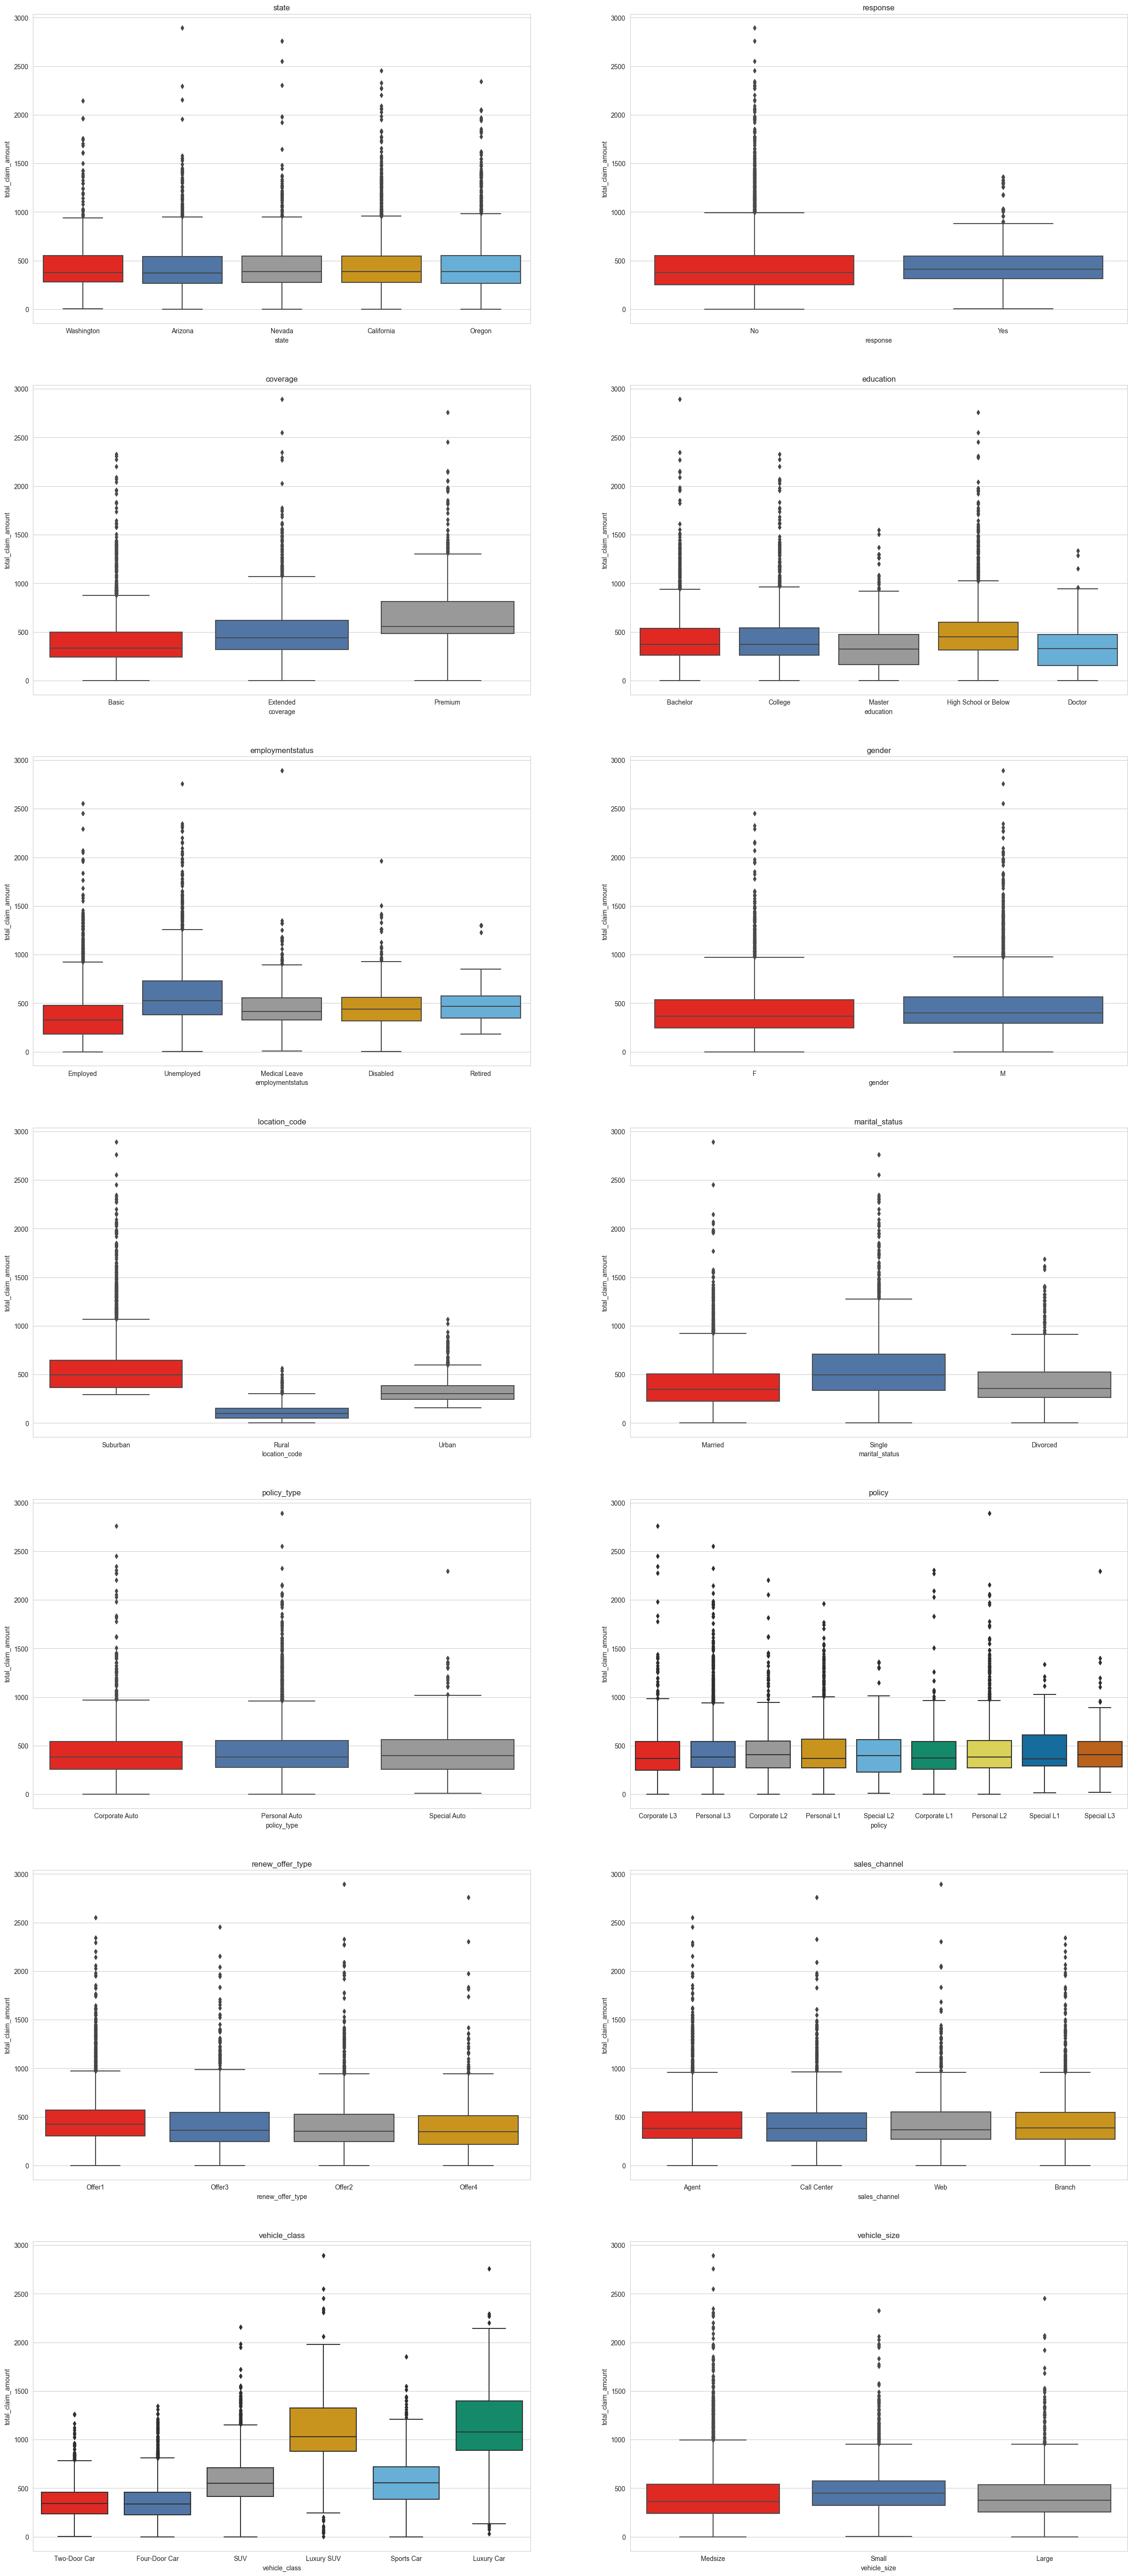

In [23]:

#Create a matrix of panels with boxplots sharing the same y axis (total claim amount)

fig, axs = plt.subplots(7, 2, figsize=(30, 70)) # width and height 
axs = axs.flatten()
fig.subplots_adjust(hspace=.2, wspace=.2) # ensure that the plots do not overlap

# create a for loop to iterate over the columns in the categoricals df. The enumerate() function is used to get both the index and the value of each column
for i, column in enumerate(categoricals.columns):
    sns.boxplot (data=customer_df2, y="total_claim_amount", x=column,  palette=sns.color_palette(colorblind1),   ax=axs[i])   
    
    axs[i].set_title(column) # assign the colour blind palette 

plt.show()



<AxesSubplot: xlabel='vehicle_size', ylabel='total_claim_amount'>

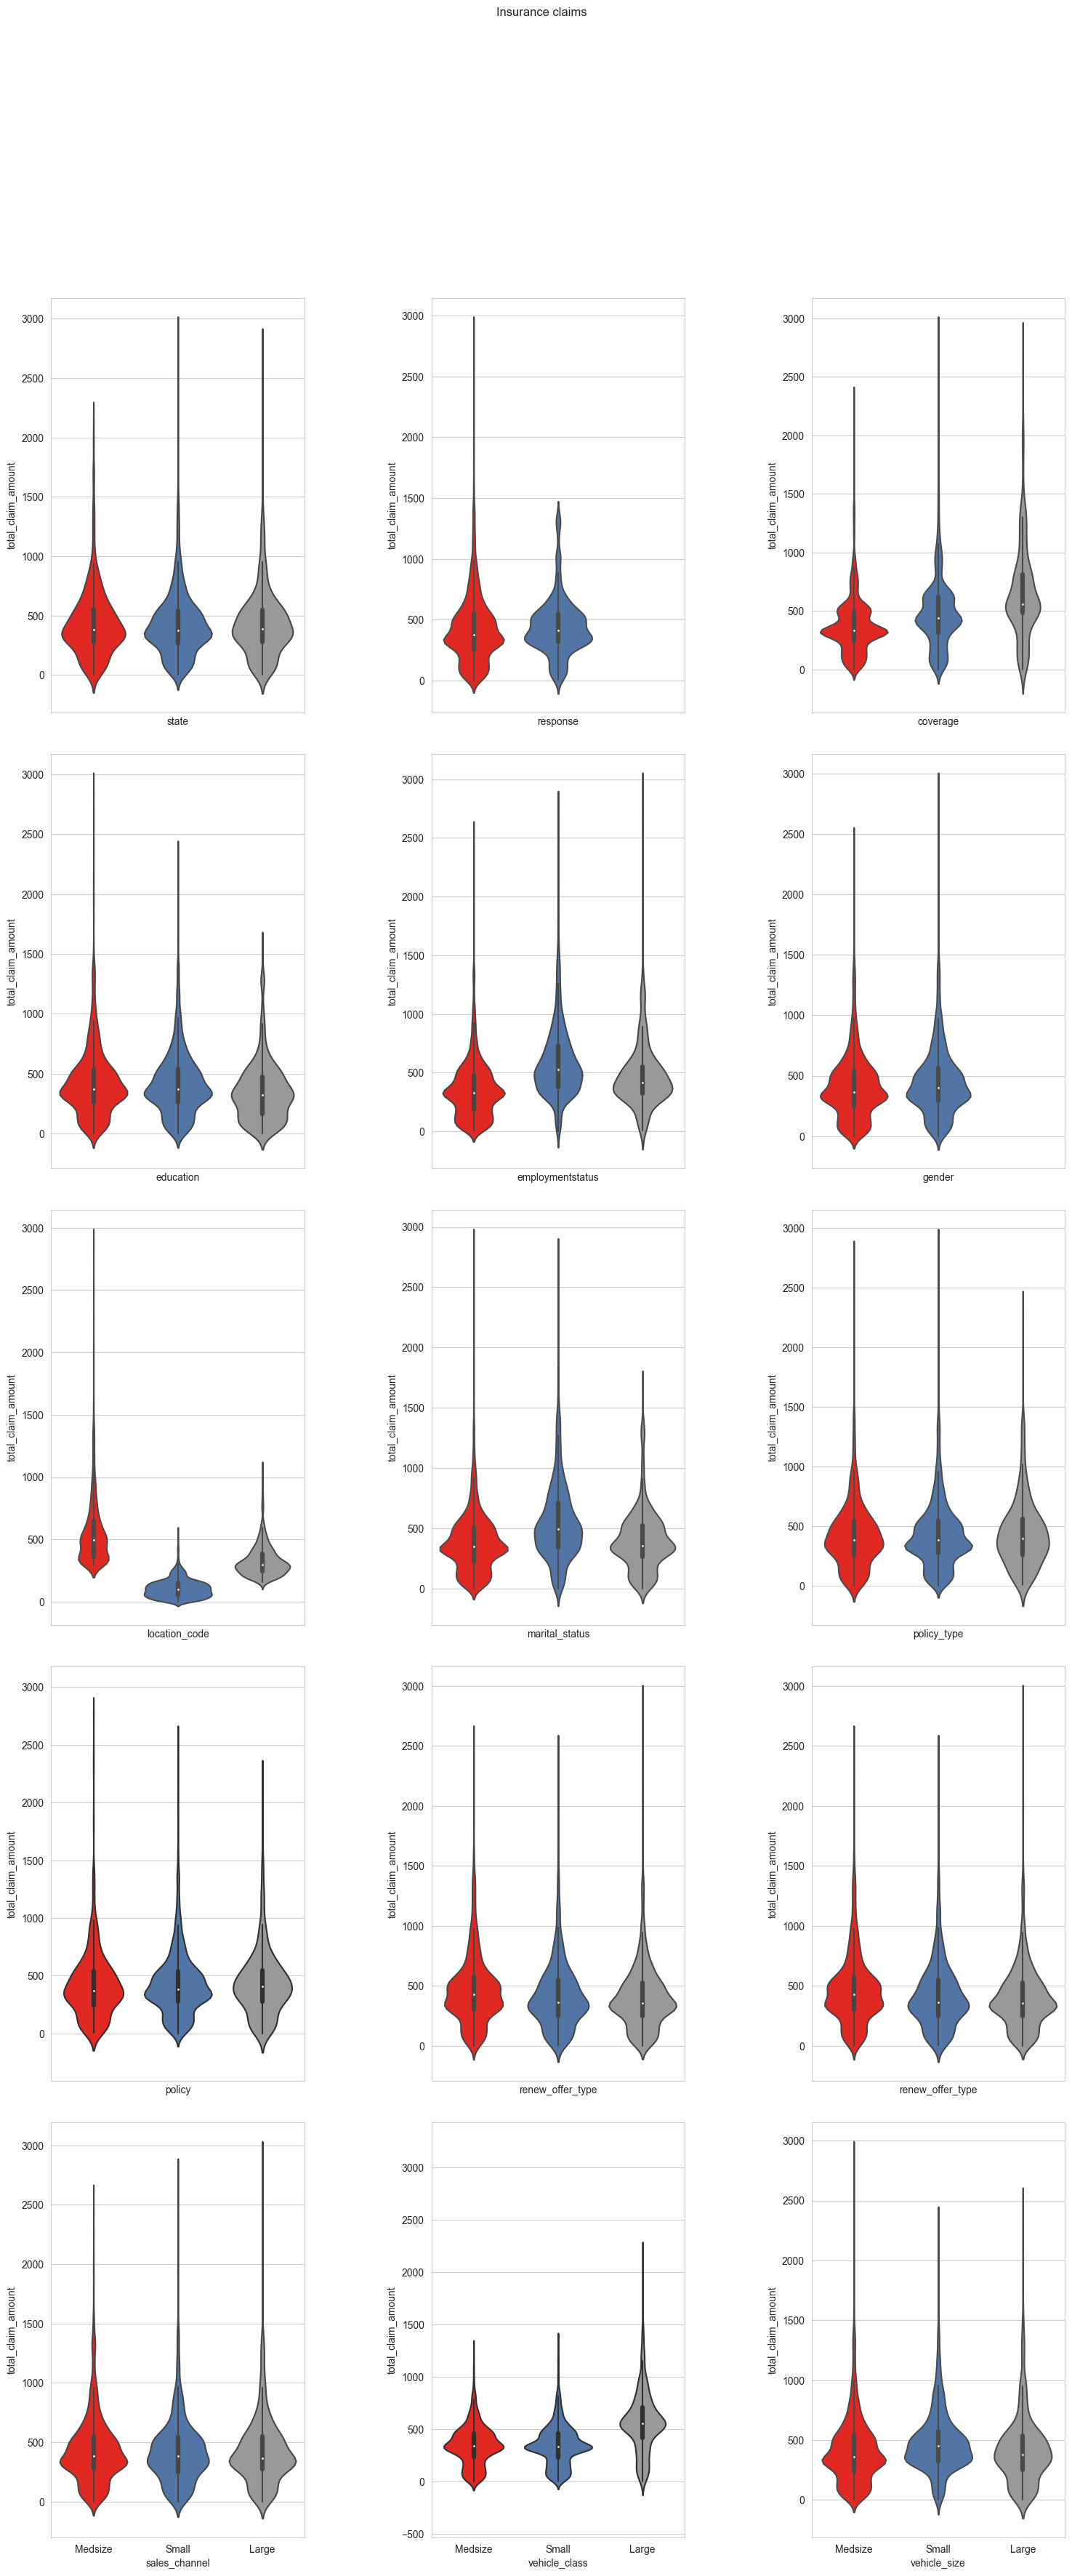

In [26]:



# Place all of the violin plots on 5 rows  x 3 columns and a shared x axis (sharex=true). This creates a matrix of panels defined by row and column faceting variables. Each plot shares the same x axis (total claim amount)

fig, axes = plt.subplots(5, 3, sharex=True, figsize=(18,40)) 

fig.subplots_adjust(hspace=0.1, wspace=.5) # ensure that the plots do not overlap

fig.suptitle('Insurance claims')

sns.violinplot(ax=axes[0, 0], data=customer_df2, y="total_claim_amount", x="state")
sns.violinplot(ax=axes[0, 1], data=customer_df2, y="total_claim_amount", x="response")
sns.violinplot(ax=axes[0, 2], data=customer_df2, y="total_claim_amount", x="coverage")
sns.violinplot(ax=axes[1, 0], data=customer_df2, y="total_claim_amount", x="education")
sns.violinplot(ax=axes[1, 1], data=customer_df2, y="total_claim_amount", x="employmentstatus")
sns.violinplot(ax=axes[1, 2], data=customer_df2, y="total_claim_amount", x="gender")
sns.violinplot(ax=axes[2, 0], data=customer_df2, y="total_claim_amount", x="location_code")
sns.violinplot(ax=axes[2, 1], data=customer_df2, y="total_claim_amount", x="marital_status")
sns.violinplot(ax=axes[2, 2], data=customer_df2, y="total_claim_amount", x="policy_type")
sns.violinplot(ax=axes[3, 0], data=customer_df2, y="total_claim_amount", x="policy")
sns.violinplot(ax=axes[3, 1], data=customer_df2, y="total_claim_amount", x="renew_offer_type")
sns.violinplot(ax=axes[3, 2], data=customer_df2, y="total_claim_amount", x="renew_offer_type")
sns.violinplot(ax=axes[4, 0], data=customer_df2, y="total_claim_amount", x="sales_channel")
sns.violinplot(ax=axes[4, 1], data=customer_df2, y="total_claim_amount", x="vehicle_class")
sns.violinplot(ax=axes[4, 2], data=customer_df2, y="total_claim_amount", x="vehicle_size")


### 6. For the categorical data, check if there is any data cleaning that need to perform. 
**Hint**: You can use the function `value_counts()` on each of the categorical columns and check the representation of different categories in each column. Discuss if this information might in some way be used for data cleaning.

In [27]:
## Count instances of the target variable 
#count frequency of each value in 'Churn' column
counts = categoricals['sales_channel'].value_counts()
##count frequency of each value in 'Churn' column as percentage of total 
pct = categoricals['sales_channel'].value_counts(normalize=True)

#concatenate results into one DataFrame
pd.concat([counts,pct], axis=1, keys=['n', '%'])

,n,%
Agent,3477,0.380666
Branch,2567,0.281038
Call Center,1765,0.193234
Web,1325,0.145062


In [28]:
# create an empty data frame to store the results
results_df = pd.DataFrame()

# iterate through the columns in the data frame
for col in categoricals.columns:
    # count the values in the column
    counts = categoricals[col].value_counts()
    # calculate the percentage of each value in the column
    pct = categoricals[col].value_counts(normalize=True)
    # concatenate the results into one data frame
    df = pd.concat([counts, pct], axis=1, keys=['n', '%'])
    # add a column to identify which column the results are for
    df['Column'] = col
    # append the results to the overall results data frame
    results_df = pd.concat([results_df, df], axis=0)

    pd.set_option('display.max_rows', None) #show all rows

# print the results
print(results_df)



                         n         %            Column
California            3150  0.344865             state
Oregon                2601  0.284760             state
Arizona               1703  0.186446             state
Nevada                 882  0.096562             state
Washington             798  0.087366             state
No                    7826  0.856799          response
Yes                   1308  0.143201          response
Basic                 5568  0.609591          coverage
Extended              2742  0.300197          coverage
Premium                824  0.090212          coverage
Bachelor              2748  0.300854         education
College               2681  0.293519         education
High School or Below  2622  0.287059         education
Master                 741  0.081125         education
Doctor                 342  0.037443         education
Employed              5698  0.623823  employmentstatus
Unemployed            2317  0.253668  employmentstatus
Medical Le

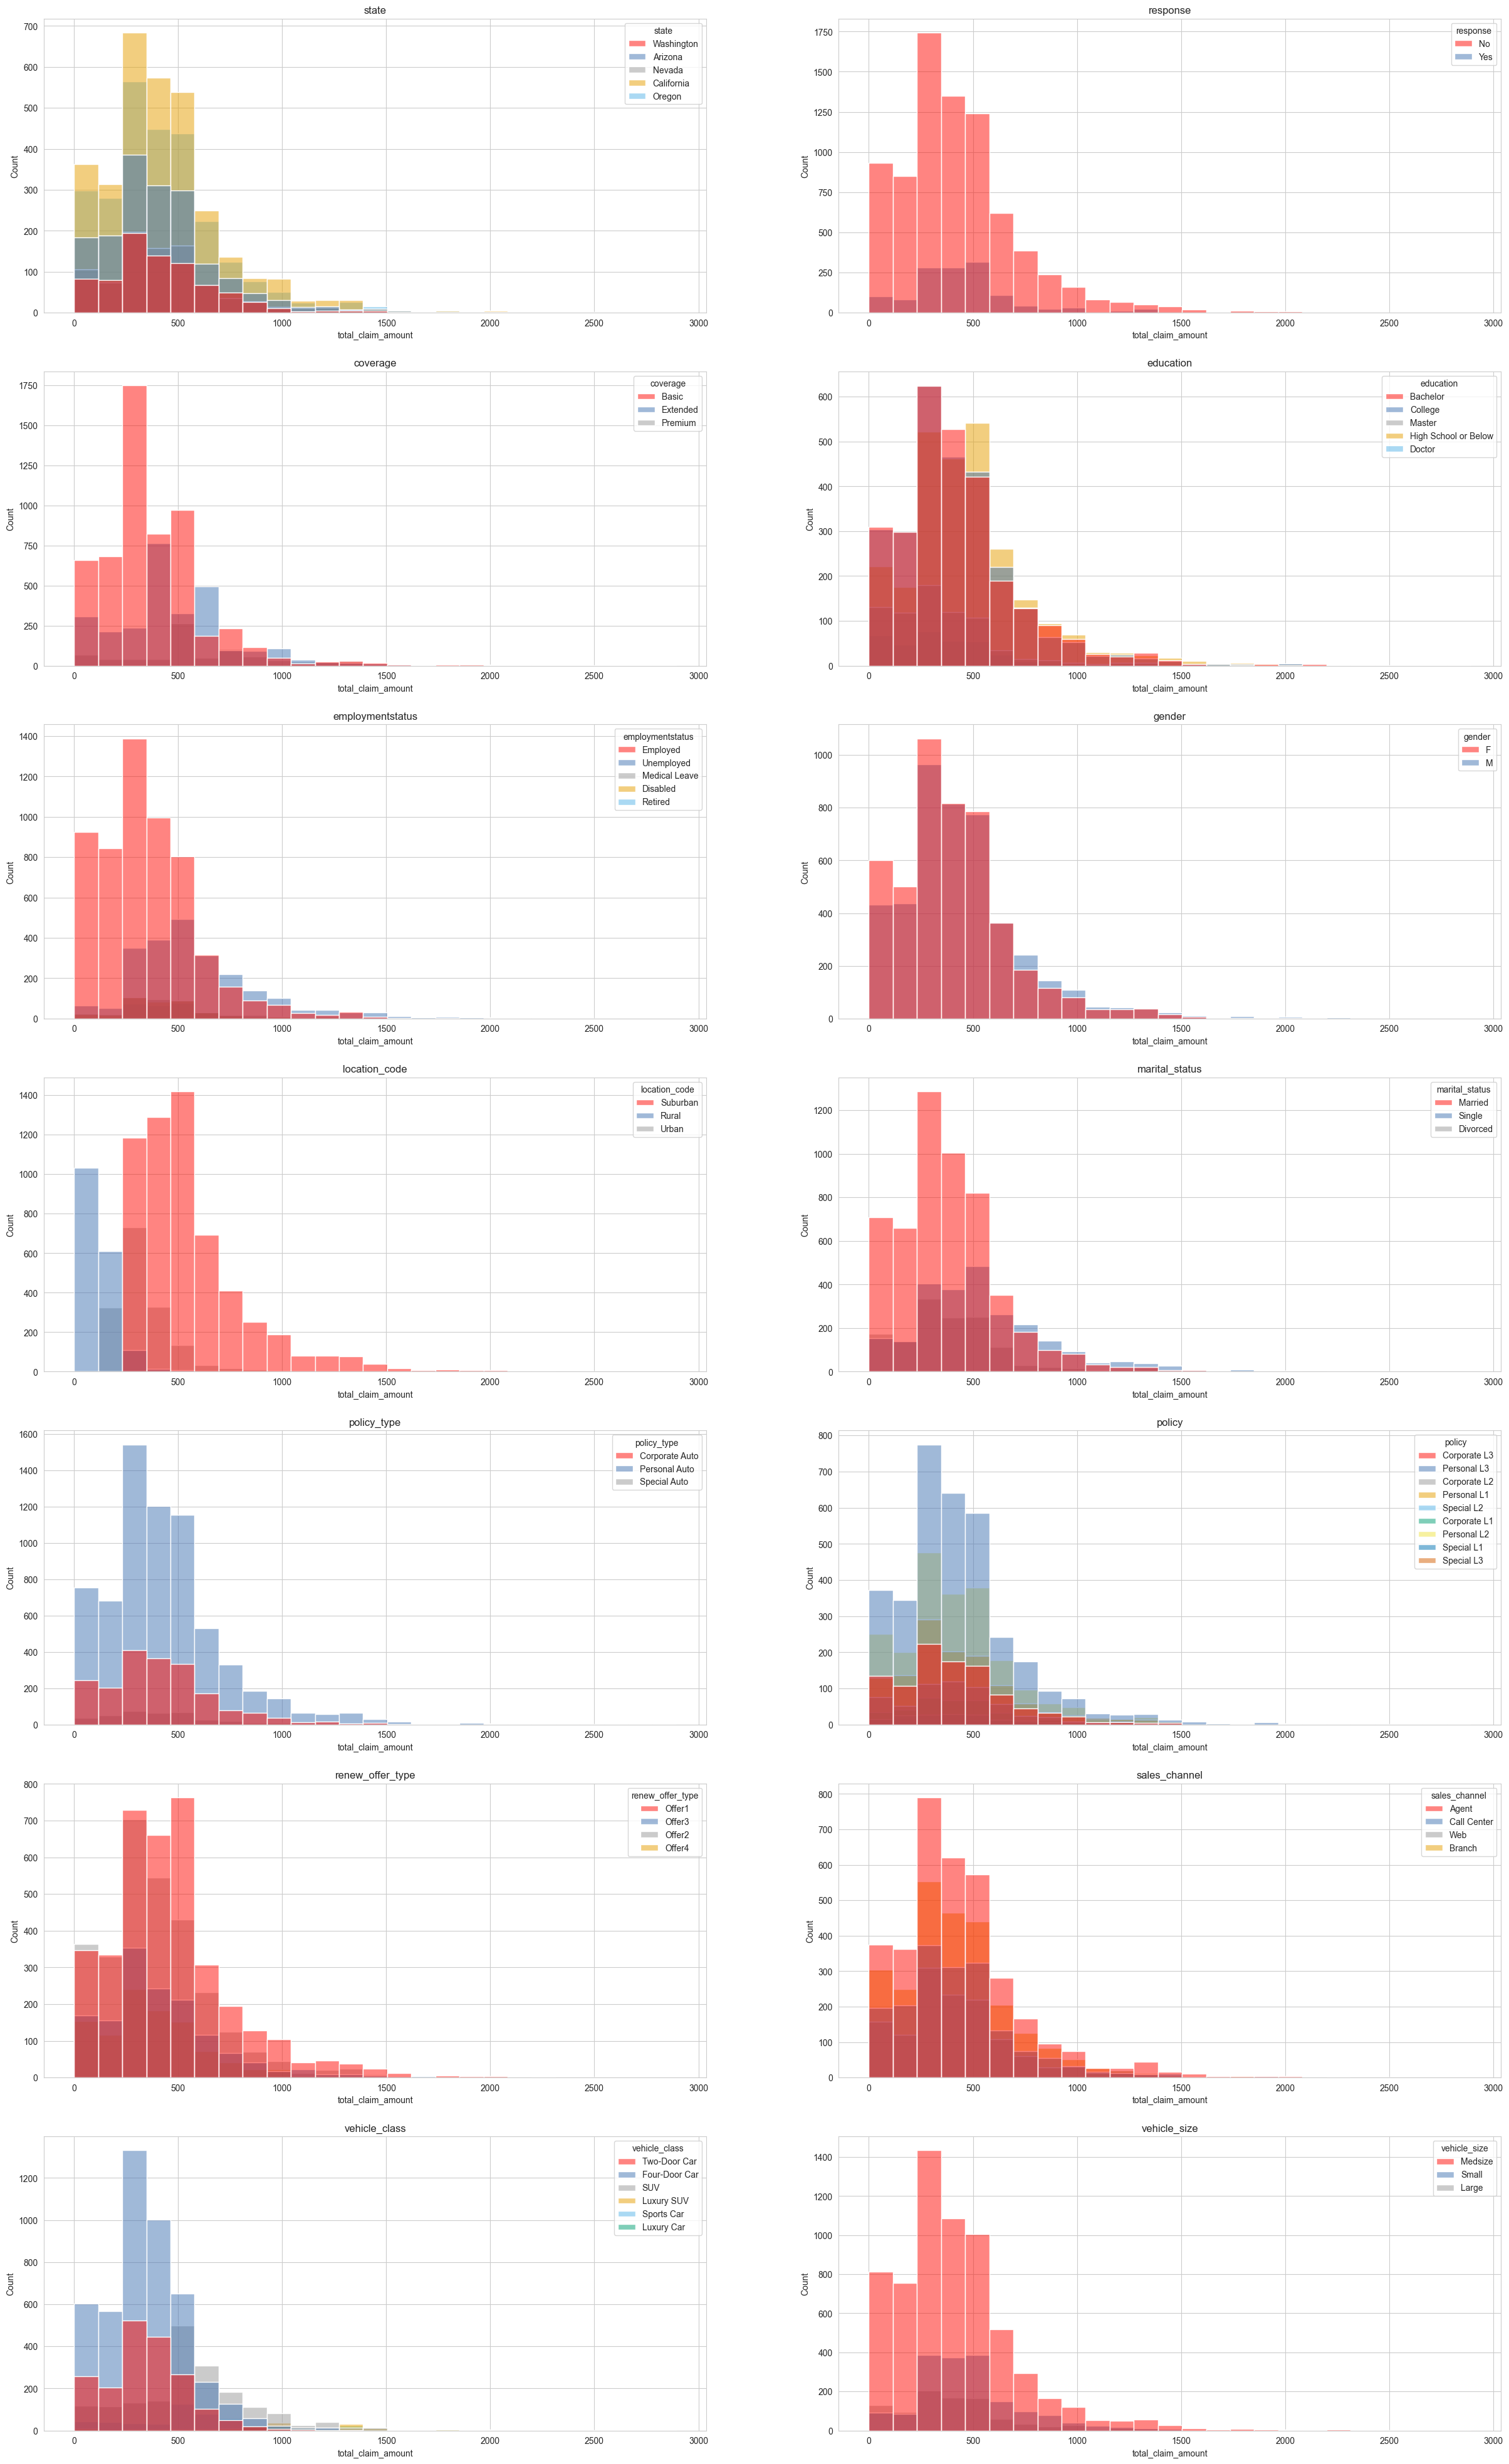

In [29]:

colorblind1 = sns.set_palette(sns.color_palette(colors))

#Create a matrix of panels sharing the same y axis (total claim amount)

fig, axs = plt.subplots(7, 2, figsize=(30, 50)) # width and height 
axs = axs.flatten()
fig.subplots_adjust(hspace=.2, wspace=.2) # ensure that the plots do not overlap


for i, column in enumerate(categoricals.columns):
    sns.histplot (data=customer_df2, x='total_claim_amount', hue=column, palette=sns.color_palette(colorblind1), bins=25, ax=axs[i]) #make larger bins to avoid too much granularity
    axs[i].set_title(column)

plt.show()


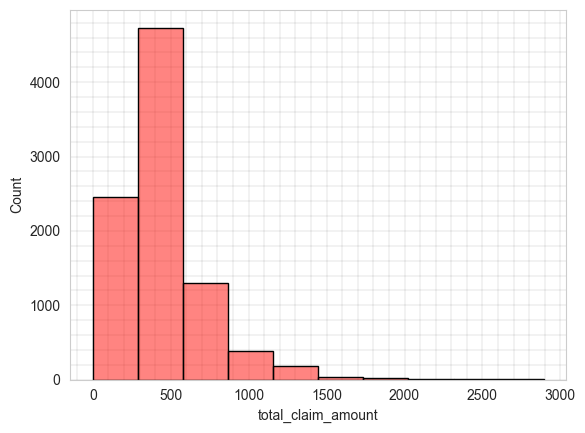

In [30]:
claimplot = sns.histplot(data=customer_df2, x='total_claim_amount', alpha=0.5, palette='BuPu', edgecolor='black', bins=10)

# add minor grid lines
claimplot.grid(b=True, which='major', color='black', linewidth=0.075)
claimplot.grid(b=True, which='minor', color='black', linewidth=0.075)
claimplot.minorticks_on()



We can 

In [31]:
#make buckets for claim amount 
conditions = [
    df['price'].lt(400), 
    df['price'].ge(401) & df['price'].le(1000), 
    df['price'].gt(1000)]

choices = ['low', 'medium', 'high']

df['price_category'] = np.select(conditions, choices)

KeyError: 'price'

In [ ]:
#pd.crosstab(index=customer_df2['renew_offer_type'], columns=customer_df2['renew_offer_type'], colnames=['gender']).unstack().reset_index().rename(columns={0: "total_claim_amount"})

#pd.crosstab(customer_df2.renew_offer_type, customer_df2.total_claim_amount)

pd.crosstab(customer_df2.total_claim_amount, customer_df2.renew_offer_type,  normalize='all')



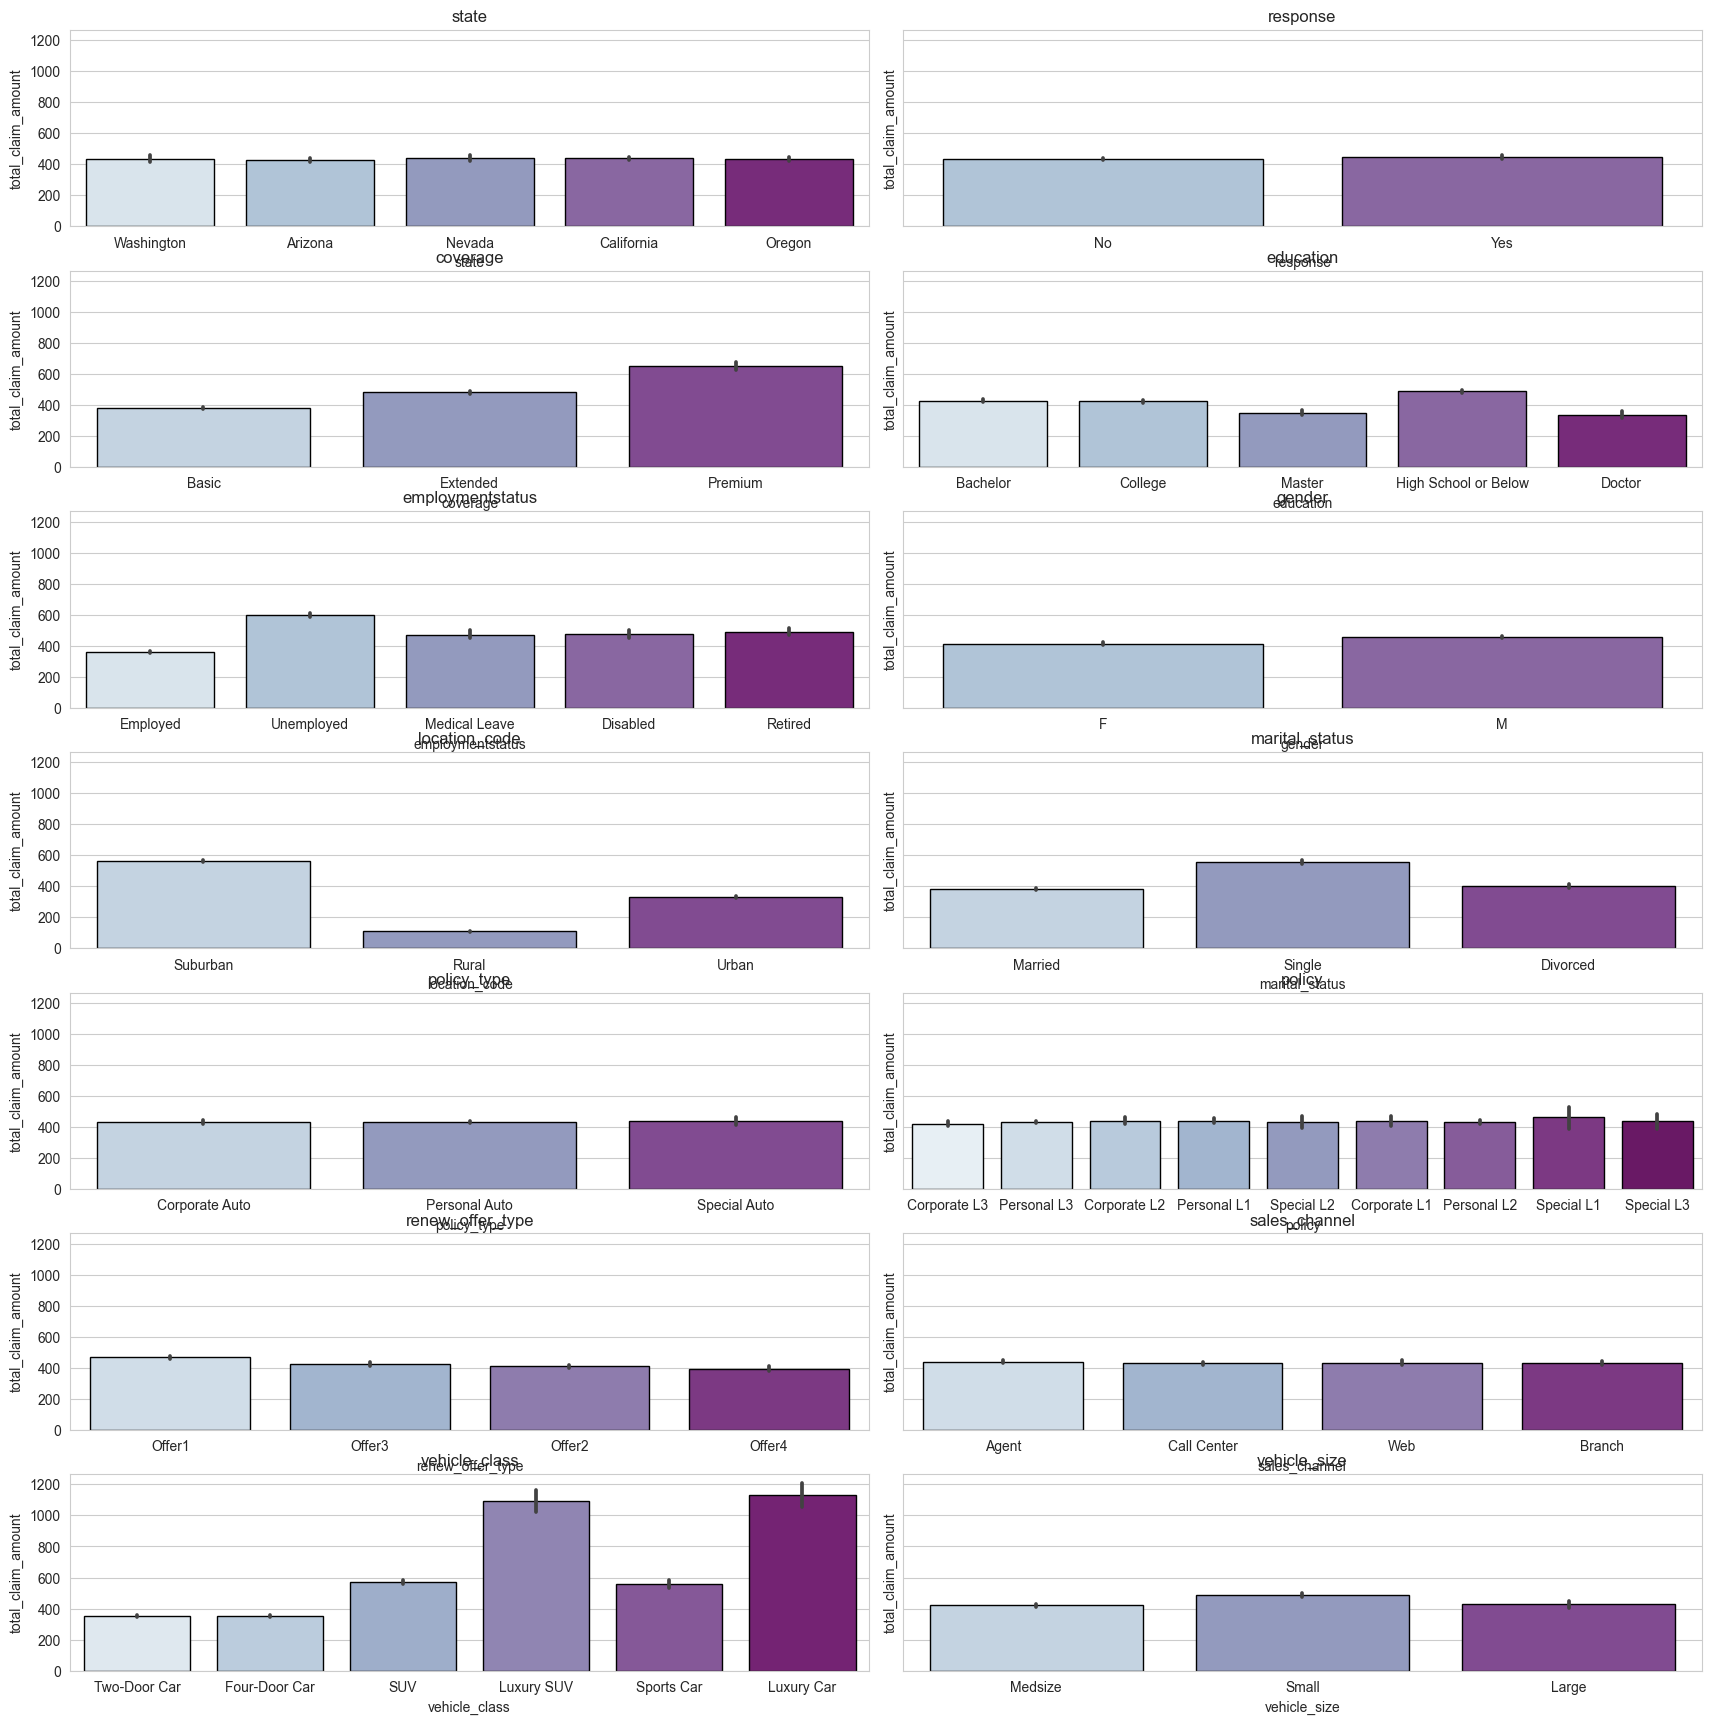

In [24]:

#Create a matrix of panels sharing the same y axis (total claim amount)

fig, axs = plt.subplots(7, 2, figsize=(17, 17), sharey=True) 
axs = axs.flatten()
plt.tight_layout()

# sharey means that they all share the same y axis which shows differences more clearly as they are on the same scale

# loop through the categoricals to show a barplot

for i, column in enumerate(categoricals.columns):
    sns.barplot(x=column, y='total_claim_amount', data=customer_df2, palette='BuPu', edgecolor='black', ax=axs[i])
    axs[i].set_title(column)

plt.show()



<div style="color:122c91;
           display:fill;
           border-radius:5px;
           background-color:#d3e1f8;
           font-size:80%;
           font-family:Courier;
           letter-spacing:0.5px">

<p style="padding: 20px;">All that is gold does not glitter,Not all those who wander are lost;The old that is strong does not wither,Deep roots are not reached by the frost.
</p>
</div>